# Screening for monoclonal antibodies that neutralize wildtype A/HongKong/45/2019 chimeric virus

We currently have 3 monoclonal antibodies from Patrick Wilson's lab that neutralize GFP virus expressing the library background H3 ([plasmid 3023](https://github.com/jbloomlab/plasmids/blob/master/genbank_maps/3023_pHH_WSNHAflank_HK19-cterm-nopac_WSNHAduppac-stop_edited.gb)). However, these antibodies are relatively low potency and have HAI activity against a broad range of strains. Ideally, I'd like to identify additional antibodies that are more potent and target known sites on the H3 head.

In [Zost et al. (2019)](https://pubmed.ncbi.nlm.nih.gov/31875553/), they map the binding footprints of 33 monoclonal antibodies against the H3 A/Victoria/210/2009. I aligned the sequences of A/Victoria/210/2009 and A/HongKong/45/2019, and identified 6 antibodies that targeted a region conserved between these two viruses:
* 5G01
* 3B06
* 1B02
* 3G01
* 1C04
* 5G04

This notebook analyzes neutralization assays testing for antibody neutralization activity against GFP virus expressing the wildtype chimeric HK/19 H3.

In [1]:
import pandas as pd
import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE
import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.float_format', '{:.3g}'.format)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 400)

### 5-3-22: Initial run of 4 / 6 mAbs
Testing 4 out of 6 monoclonal antibodies for activity against GFP virus carrying H3 from plasmid 3023.

In [3]:
data = (
    pd.read_excel('neut_data/220503_hk19_mAb-neuts.xlsx')
    .rename(columns={
        'mAb': 'serum', # neutcurve package refers to all Ab samples as 'sera'
        'concentration (ug/mL)': 'concentration'
    })
)

data.head()

,serum,virus,replicate,concentration,fraction infectivity
0,5G01,HK19,1,2,0.994
1,5G01,HK19,1,1,1.08
2,5G01,HK19,1,0.5,0.971
3,5G01,HK19,1,0.25,1.12
4,5G01,HK19,1,0.125,0.996


In [4]:
fits = neutcurve.CurveFits(data)

for serum in fits.sera:
    print(f"Viruses measured against {serum}:\n" +
          str(fits.viruses[serum]))

Viruses measured against 5G01:
['HK19', 'H6']
Viruses measured against 3B06:
['HK19', 'H6']
Viruses measured against 1B02:
['HK19', 'H6']
Viruses measured against 3G01:
['HK19', 'H6']


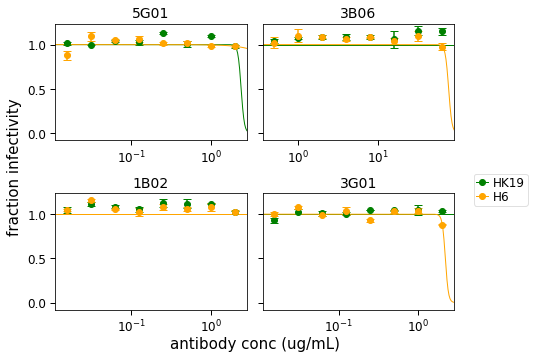

In [5]:
fig, axes = fits.plotSera(ncol=2,
                          xlabel='antibody conc (ug/mL)',
                          virus_to_color_marker={
                              'HK19': ('green', 'o'),
                              'H6': ('orange', 'o')},
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [8.2, 5.6]])
# plt.savefig('figures/220503_mAb_neut-curves.pdf', bbox_inches=bbox)

Unfortunately, it doesn't look like any of these monoclonals successfully neutralized HK/19 at the concentrations tested. A few caveats - 
* I forgot to include a positive control. This was my first time running neuts, so there's always the possibility of experimental error.
* The concentrations I tested were on the lower side. Note that the monoclonals from Siri all had IC50's of around 10ug/mL or higher. I based these concentrations off of reported MN and HAI titers from the Zost (2019) paper, but I think I should also bump up to higher concentrations.

So for the next run, make the following changes:
* Include FI6V3 as a positive control
* Increase highest concentration to around 5e2 ug/mL

Will re-assay all 4 of these antibodies, while also running the remaining 2 that I didn't include here (1C04 and 5G04).

### 7-1-22: Repeat with all mAb's plus positive control
Re-ran these 4 monoclonals, plus the 2 remaining antibodies that I hadn't assayed yet (1C04 and 5G04). Also include FI6V3 as a positive control.

For this run, I used a starting concentration of 25ug/mL for all 6 test monoclonals, and 10ug/mL for FI6V3. Diluted each mAb 3-fold down 8 wells of the plate. I also used a new batch of HK19-GFP that I harvested in bulk and titered last week.

In [6]:
data_220701 = (
    pd.read_excel('neut_data/220701_mAb_neuts_tidy.xlsx')
    .rename(columns={
        'mAb': 'serum', # neutcurve package refers to all Ab samples as 'sera'
#         'concentration (ug/mL)': 'concentration'
    })
)

data_220701.head()

,serum,virus,replicate,concentration,fraction infectivity
0,5G01,HK19,1,25,0.906
1,5G01,HK19,1,8.33,0.984
2,5G01,HK19,1,2.78,1.04
3,5G01,HK19,1,0.926,0.988
4,5G01,HK19,1,0.309,0.985


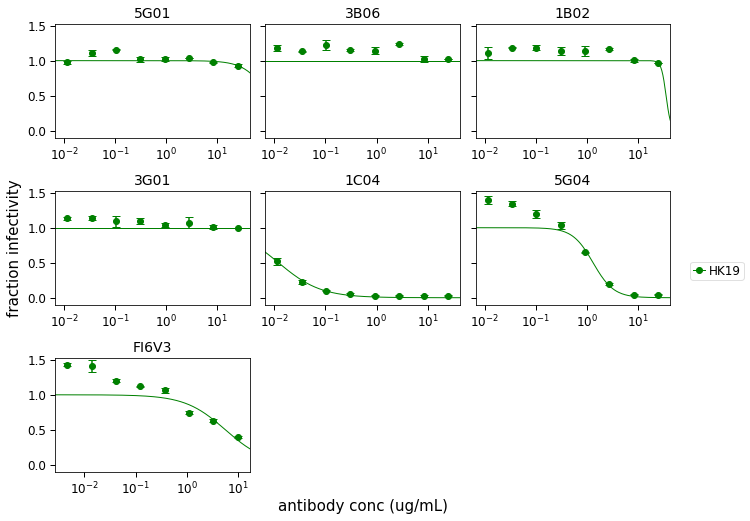

In [7]:
fits = neutcurve.CurveFits(data_220701)

# for serum in fits.sera:
#     print(f"Viruses measured against {serum}:\n" +
#           str(fits.viruses[serum]))

fig, axes = fits.plotSera(ncol=3,
                          xlabel='antibody conc (ug/mL)',
                          virus_to_color_marker={
                              'HK19': ('green', 'o'),
                          },
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [11, 8]])
plt.savefig('figures/220701_zost_mAb_neut-curves.pdf', bbox_inches=bbox)

### Patrick Wilson mAb re-analysis
I also noticed that in the initial screening of antibodies sent from Patrick Wilson's lab on 11-16-21, the starting concentration was listed as 2-fold higher than it actually was (50ug/mL instead of 25ug/mL). I edited the concentrations in the file `neut_data/211116_wilson-mAb_neuts_tidy_REVISED.xlsx`, and plot the new neut curves here:

In [8]:
wilson_mAb_1 = (
    pd.read_excel('neut_data/211116_wilson-mAb_neuts_tidy_REVISED.xlsx')
    .rename(columns={
        'mAb': 'serum', # neutcurve package refers to all Ab samples as 'sera'
#         'concentration (ug/mL)': 'concentration'
    })
)

wilson_mAb_1['serum'] = wilson_mAb_1['serum'].replace({'FI6v3': 'FI6V3_run1'})

wilson_mAb_2 = (
    pd.read_excel('neut_data/211119_wilson-mAb_neuts_tidy_REVISED.xlsx')
    .rename(columns={
        'mAb': 'serum', # neutcurve package refers to all Ab samples as 'sera'
#         'concentration (ug/mL)': 'concentration'
    })
)

wilson_mAb_2['serum'] = wilson_mAb_2['serum'].replace({'FI6v3': 'FI6V3_run2'})

revised_wilson_mAb = pd.concat([wilson_mAb_1, wilson_mAb_2], ignore_index=True, sort=False)
revised_wilson_mAb['virus'] = revised_wilson_mAb['virus'].replace({'HK19_WT': 'HK19'})
revised_wilson_mAb

,serum,virus,replicate,concentration,fraction infectivity
0,2E06,HK19,1,25,0.902
1,2E06,HK19,1,5,1.01
2,2E06,HK19,1,1,1.07
3,2E06,HK19,1,0.2,1.03
4,2E06,HK19,1,0.04,0.949
...,...,...,...,...,...
411,FI6V3_run2,H6_R235M,2,0.08,1.08
412,FI6V3_run2,H6_R235M,2,0.016,1.15
413,FI6V3_run2,H6_R235M,2,0.0032,1.03
414,FI6V3_run2,H6_R235M,2,0.00064,0.906


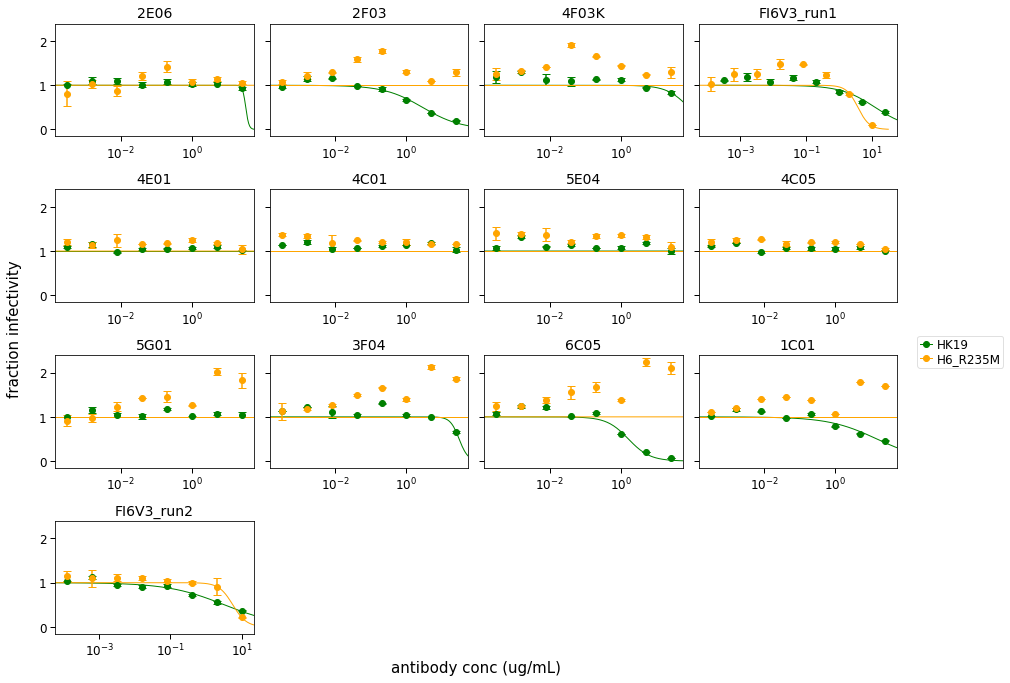

In [11]:
fits = neutcurve.CurveFits(revised_wilson_mAb)

# for serum in fits.sera:
#     print(f"Viruses measured against {serum}:\n" +
#           str(fits.viruses[serum]))

fig, axes = fits.plotSera(ncol=4,
                          xlabel='antibody conc (ug/mL)',
                          virus_to_color_marker={
                              'HK19': ('green', 'o'),
                              'H6_R235M': ('orange', 'o')},
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [8.2, 5.6]])

In [12]:
neutralizing_abs_wilson = revised_wilson_mAb.loc[
    (revised_wilson_mAb['serum'] == '2F03') |
    (revised_wilson_mAb['serum'] == '6C05') |
    (revised_wilson_mAb['serum'] == '1C01')
]

In [13]:
fits = neutcurve.CurveFits(neutralizing_abs_wilson)
fits.fitParams(ics=[50,99])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,2F03,HK19,average,2,2.83,interpolated,2.83,25,lower,>25,2.83,0.804,1,0
1,2F03,H6_R235M,average,2,25,lower,>25,25,lower,>25,580,6.73,1,0
2,6C05,HK19,average,2,1.62,interpolated,1.62,25,lower,>25,1.62,1.43,1,0
3,6C05,H6_R235M,average,2,25,lower,>25,25,lower,>25,204,11.6,1,0
4,1C01,HK19,average,2,14.5,interpolated,14.5,25,lower,>25,14.5,0.644,1,0
5,1C01,H6_R235M,average,2,25,lower,>25,25,lower,>25,583,8.75,1,0


The IC50's of the 3 neutralizing antibodies are now cut in half. Doesn't make a huge difference as we're working on a log scale, but still good to catch! Plot a clean version here:

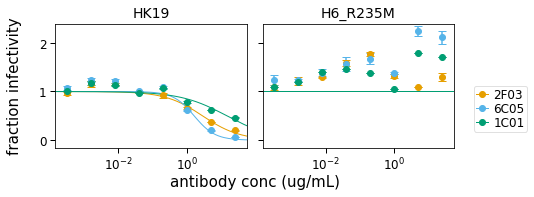

In [14]:
fig, axes = fits.plotViruses(xlabel='antibody conc (ug/mL)',
                          serum_to_color_marker={
                              '2F03': ('#E69F00', 'o'),
                              '6C05': ('#56B4E9', 'o'),
                              '1C01': ('#009E73', 'o')  
                          }, 
                          sharex = False
                         )

### Final set of neutralizing mAb's
Combine data from screening the Wilson lab antibodies and the new monoclonals we ordered and screened here.

In [15]:
neutralizing_abs_zost = data_220701.loc[
    (data_220701['serum'] == '1C04') |
    (data_220701['serum'] == '5G04') 
]

neutralizing_abs_full = pd.concat([neutralizing_abs_wilson, neutralizing_abs_zost], ignore_index=True, sort=False)
# neutralizing_abs_full = neutralizing_abs_full.loc[
#     (neutralizing_abs_full['virus'] == 'HK19')
# ]
neutralizing_abs_full

,serum,virus,replicate,concentration,fraction infectivity
0,2F03,HK19,1,25,0.196
1,2F03,HK19,1,5,0.375
2,2F03,HK19,1,1,0.687
3,2F03,HK19,1,0.2,0.876
4,2F03,HK19,1,0.04,0.992
...,...,...,...,...,...
123,5G04,HK19,2,0.926,0.656
124,5G04,HK19,2,0.309,0.988
125,5G04,HK19,2,0.103,1.26
126,5G04,HK19,2,0.0343,1.31


In [16]:
fits = neutcurve.CurveFits(neutralizing_abs_full)

In [17]:
fits.fitParams(ics=[50,99])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,2F03,HK19,average,2,2.83,interpolated,2.83,25,lower,>25,2.83,0.804,1,0
1,2F03,H6_R235M,average,2,25,lower,>25,25,lower,>25,580,6.73,1,0
2,6C05,HK19,average,2,1.62,interpolated,1.62,25,lower,>25,1.62,1.43,1,0
3,6C05,H6_R235M,average,2,25,lower,>25,25,lower,>25,204,11.6,1,0
4,1C01,HK19,average,2,14.5,interpolated,14.5,25,lower,>25,14.5,0.644,1,0
5,1C01,H6_R235M,average,2,25,lower,>25,25,lower,>25,583,8.75,1,0
6,1C04,HK19,average,2,0.012,interpolated,0.012,0.978,interpolated,0.978,0.012,1.04,1,0
7,5G04,HK19,average,2,1.33,interpolated,1.33,11.2,interpolated,11.2,1.33,2.16,1,0


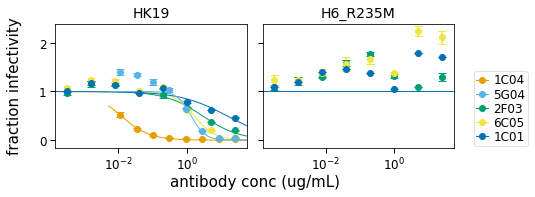

In [38]:
fig, axes = fits.plotViruses(xlabel='antibody conc (ug/mL)',
                          serum_to_color_marker={
                              '1C04': ('#E69F00', 'o'),
                              '5G04': ('#56B4E9', 'o'),
                              '2F03': ('#009E73', 'o'),
                              '6C05': ('#F0E442', 'o'),
                              '1C01': ('#0072B2', 'o'),
                          }, 
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [8.2, 3.5]])
plt.savefig('figures/220701_mAb_neut-curves_full.pdf', bbox_inches=bbox)